In [9]:
# following code is adapted from: https://learnche.org/3E4/Assignment_2_-_2010_-_Solution/Bonus_question
# 2) a)
import numpy as np
def forwardElim(A, b, n):
    # iterate through all rows for current 'pivot' position
    for pos in range(0, n-1):
        # change all rows below current position based on k factor
        for i in range(pos+1, n):
            k = A[i,pos]/A[pos,pos]
            for j in range(pos, n):
                A[i,j] = A[i,j]-k*A[pos,j]
            # account for b vector as well
            b[i] = b[i]-k*b[pos]
    return A, b
def backSub(A, b, n):
    x = np.zeros((n,1))
    x[n-1] = b[n-1]/A[n-1, n-1]
    #iterate from bottom up
    for row in range(n-2, -1, -1):
        sums = b[row]
        for j in range(row+1, n):
            sums = sums-A[row,j]*x[j]
        x[row] = sums/A[row,row]
    return x
def gaussianElimination(A, b):
    n = len(A)
    A, b = forwardElim(A, b, n)
    return backSub(A, b, n)

In [10]:
# 2) b)
A = []
for i in range(10):
    row = []
    for j in range(10):
        Aij = np.cos((i)*(j+.5)*np.pi/10)
        row.append(Aij)
    A.append(row)
A = np.array(A)
xtrue = [1,2,3,4,5,6,7,8,9,10]
b = np.matmul(A,xtrue)

In [35]:

x = gaussianElimination(A,b)
np.set_printoptions(precision=2,suppress=True)
print("A="+str(A))
print("b="+str(b))
err = []
for i in range(len(b)):
    err.append(abs(xtrue[i]-x[i]))

A=[[   1.      1.      1.      1.      1.      1.      1.      1.      1.
     1.  ]
 [   0.     -0.1    -0.28   -0.53   -0.83   -1.14   -1.44   -1.69   -1.88
    -1.98]
 [   0.      0.      0.1     0.47    1.22    2.4     3.88    5.42    6.7
     7.42]
 [   0.      0.      0.     -0.24   -1.34   -4.14   -9.01  -15.32  -21.4
   -25.16]
 [   0.      0.      0.      0.      0.8     5.05   16.35   35.58   57.57
    72.54]
 [   0.      0.      0.      0.      0.     -3.16  -19.97  -61.45 -120.6
  -165.99]
 [   0.      0.      0.      0.      0.      0.     11.88   67.68  177.18
   275.96]
 [   0.      0.      0.      0.      0.      0.      0.    -34.26 -154.86
  -294.56]
 [   0.      0.      0.      0.      0.      0.      0.      0.     56.96
   165.3 ]
 [   0.      0.      0.      0.      0.      0.      0.      0.      0.
   -31.96]]
b=[   55.     -74.5    227.63  -662.31  1676.96 -3395.63  4978.8  -4613.41
  2165.58  -319.62]


In [12]:
np.set_printoptions(precision=8,suppress=False)
err

[array([2.2346569e-12]),
 array([4.55901983e-12]),
 array([3.42348372e-12]),
 array([1.24078525e-12]),
 array([2.66453526e-13]),
 array([2.20268248e-13]),
 array([6.17284002e-13]),
 array([2.33590924e-12]),
 array([3.0002667e-12]),
 array([1.38378198e-12])]

In [27]:
# 2) c)
from numpy.random import default_rng

Ac = default_rng().standard_normal((1000,1000))
Ad = np.copy(Ac)
xctrue = np.arange(1,1001)
bc = np.matmul(Ac,xctrue)
bd = np.copy(bc)

In [28]:
import time
start_time = time.time()
x = gaussianElimination(Ac,bc)
print("Time to complete: " + str(format(time.time()-start_time, '.2f')) + " seconds")

Time to complete: 283.62 seconds


In [29]:
err = []
for i in range(len(bc)):
    err.append(abs(xctrue[i]-x[i]))
print(np.linalg.norm(err))

8.439074100085481e-07


In [30]:
# 2) d)
from scipy.linalg import solve
start_time = time.time()
x = solve(Ad,bd)
print("Time to complete: " + str(format(time.time()-start_time, '.2f')) + " seconds")

Time to complete: 0.06 seconds


In [31]:
err = []
for i in range(len(bd)):
    err.append(abs(xctrue[i]-x[i]))
print(np.linalg.norm(err))

2.3730354337959856e-09


In [42]:
# 3) a)
# i)
def highest(A,b):
    return solve(A,b)
# ii)
from scipy.linalg import lu_factor,lu_solve
def LUpivot(A,b):
    lu,piv = lu_factor(A)
    return lu_solve((lu,piv),b)
# iii)
from scipy.linalg import inv
def inverse(A,b):
    return np.matmul(inv(A),b)

In [43]:
# check for consistency
Atest = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
btest = np.array([1, 1, 1, 1])
np.set_printoptions()
print(highest(Atest,btest))
print(LUpivot(Atest,btest))
print(inverse(Atest,btest))

[ 0.05154639 -0.08247423  0.08247423  0.09278351]
[ 0.05154639 -0.08247423  0.08247423  0.09278351]
[ 0.05154639 -0.08247423  0.08247423  0.09278351]


In [98]:
# 3) b)
As = []
xtrues = []
bs = []
for i in range(5):
    As.append(default_rng().standard_normal(((i+1)*1000,(i+1)*1000)))
    xtrues.append(np.arange(1,1000*(i+1)+1))
    bs.append(np.matmul(As[i],xtrues[i]))
As = np.array(As)
xtrues = np.array(xtrues)
bs = np.array(bs)

In [99]:
# i) is highest, ii) is LUpivot, iii) is inverse
erris = [];erriis = [];erriiis =[];
timi = [];timii = [];timiii =[];
for i in range(5):
    n = (i+1)*1000
    start_time = time.time()
    xi = highest(As[i],bs[i])
    erri = np.linalg.norm(xi-xtrues[i])
    erris.append(erri)
    t = time.time()-start_time
    timi.append(t)
    print("Time (n="+str(n)+") i): " + str(format(t, '.2f')) + " seconds with error: "+str(erri))
    start_time = time.time()
    xii = LUpivot(As[i],bs[i])
    errii = np.linalg.norm(xii-xtrues[i])
    erriis.append(errii)
    t = time.time()-start_time
    timii.append(t)
    print("Time (n="+str(n)+") ii): " + str(format(t, '.2f')) + " seconds with error: "+str(errii))
    start_time = time.time()
    xiii = inverse(As[i],bs[i])
    erriii = np.linalg.norm(xiii-xtrues[i])
    erriiis.append(erriii)
    t = time.time()-start_time
    timiii.append(t)
    print("Time (n="+str(n)+") iii): " + str(format(t, '.2f')) + " seconds with error: "+str(erriii))

Time (n=1000) i): 0.05 seconds with error: 8.84780445221306e-09
Time (n=1000) ii): 0.02 seconds with error: 8.84780445221306e-09
Time (n=1000) iii): 0.05 seconds with error: 2.0023648285999885e-08
Time (n=2000) i): 0.27 seconds with error: 3.385823608509706e-08
Time (n=2000) ii): 0.12 seconds with error: 3.385823608509706e-08
Time (n=2000) iii): 0.29 seconds with error: 1.3615133821000763e-07
Time (n=3000) i): 0.59 seconds with error: 8.586477528488939e-07
Time (n=3000) ii): 0.34 seconds with error: 8.586477528488939e-07
Time (n=3000) iii): 0.91 seconds with error: 1.6009473457086285e-06
Time (n=4000) i): 1.06 seconds with error: 3.3923806758484115e-05
Time (n=4000) ii): 0.74 seconds with error: 3.3923806758484115e-05
Time (n=4000) iii): 1.98 seconds with error: 0.00013534303481689856
Time (n=5000) i): 1.83 seconds with error: 4.874339318859453e-07
Time (n=5000) ii): 1.30 seconds with error: 4.874339318859453e-07
Time (n=5000) iii): 3.49 seconds with error: 1.35311891594466e-06


Text(0.5, 0, 'n')

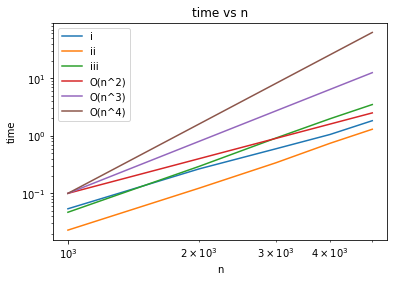

In [100]:
ns = [1000,2000,3000,4000,5000]
import matplotlib.pyplot as plt
plt.loglog(ns,timi,label="i")
plt.loglog(ns,timii,label="ii")
plt.loglog(ns,timiii,label="iii")
plt.loglog(np.linspace(1000,5000,20),np.linspace(1000,5000,20)**2/10**7,label="O(n^2)")
plt.loglog(np.linspace(1000,5000,20),np.linspace(1000,5000,20)**3/10**10,label="O(n^3)")
plt.loglog(np.linspace(1000,5000,20),np.linspace(1000,5000,20)**4/10**13,label="O(n^4)")
plt.legend()
plt.title("time vs n"); plt.ylabel("time"); plt.xlabel("n")

Text(0.5, 0, 'n')

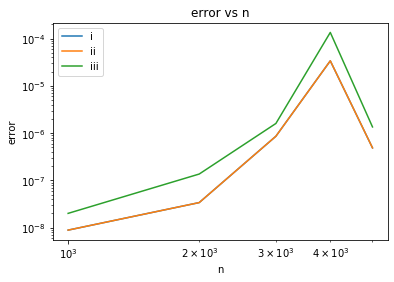

In [101]:
plt.loglog(ns,erris,label="i")
plt.loglog(ns,erriis,label="ii")
plt.loglog(ns,erriiis,label="iii")
plt.legend()
plt.title("error vs n"); plt.ylabel("error"); plt.xlabel("n")